In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

## Double Pendulum



For a double pendulum, the Lagrangian equation is as follows

$\begin{align}
  V = m_1gy_1 + m_2gy_2 = -(m_1+m_2)l_1g\cos\theta_1 - m_2l_2g\cos\theta_2
\end{align}$

$\begin{align}
  T = \frac12 m_1 v_1^2 + \frac12 m_2 v_2^2 = \frac12 m_1l_1^2\dot\theta_1^2 + \frac12 m_2 [l_1^2\dot\theta_1^2 +l_2^2\dot\theta_2^2+2l_1l_2\dot\theta_1\dot\theta_2\cos(\theta_1-\theta_2)]
\end{align}$

$\begin{align}
 \mathcal{L} = T - V
\end{align}$

The Euler-Lagrange equation is then

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\theta} = \frac{\partial\mathcal L}{\partial\theta}
\end{align}$

and after solving, we arrive at the equations

$\begin{align}
 (m_1+m_2)l_1\ddot\theta_1+m_2l_2\ddot\theta_2\cos(\theta_1-\theta_2)+m_2l_2\dot\theta_2^2\sin(\theta_1-\theta_2)+(m_1+m_2)g\sin\theta_1 = 0
\end{align}$

and

$\begin{align}
 m_2l_2\ddot\theta_2+m_2l_1\ddot\theta_1\cos(\theta_1-\theta_2)-m_2l_1\dot\theta_1^2\sin(\theta_1-\theta_2) + m_2gsin\theta_2 = 0
\end{align}$

In [2]:
class DoublePendulum:
    
    def __init__(self, L1 = 1.0, m1 = 1.0, L2 = 1.0, m2 = 1.0, g = 1.0):
        
        self.L1 = L1
        self.m1 = m1
        self.L2 = L2
        self.m2 = m2
        self.g = g
        
    def dy_dt(self, y, t):
        '''
        This function is the right hand side of the differential equation for
        [dtheta1/dt, detheta1_dot/dt, dtheta2_dt, dtheta2_dot/dt]
        
        y[0] = theta1    y[1] = theta1_dot
        y[2] = theta2    y[3] = theta2_dot
        '''
        
        theta1, z1, theta2, z2 = y
        
        c = np.cos(theta1 - theta2)
        s = np.sin(theta1 - theta2)
        denom = self.m1 + self.m2*s**2
        
        theta1dot = z1
        z1dot = ((self.m2*self.g*np.sin(theta2)*c) - (self.m2*s*(self.L1*(z1**2)*c + self.L2*(z2**2))) -
                 ((self.m1+self.m2)*self.g*np.sin(theta1))) / self.L1 / denom
        
        theta2dot = z2
        z2dot = ((self.m1+self.m2)*(self.L1*(z1**2)*s - self.g*np.sin(theta2) + self.g*np.sin(theta1)*c) + 
                 (self.m2*self.L2*(z2**2)*s*c)) / self.L2 / denom
        
        return theta1dot, z1dot, theta2dot, z2dot
    
    def solve_lagrangian(y):
        '''
        Return the total energy of the system.
        '''

        theta1, theta1_dot, theta2, theta2_dot = y.T

        T = 0.5*m1*(L1*theta1_dot)**2 + 0.5*m2*((L1*theta1_dot)**2 + (L2*theta2_dot)**2 +
            2*L1*L2*theta1_dot*theta2_dot*np.cos(theta1-theta2))

        V = (m1+m2)*L1*g*np.cos(theta1) - m2*L2*g*np.cos(theta2)

        return T - V

    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, abserr=1.0e-8, relerr=1.0e-6):
        '''
        Solve the ODE given the array of time points and initial conditions.
        '''
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0] 
        
        theta1, theta1_dot, theta2, theta2_dot = odeint(self.dy_dt, y, t_pts, atol=abserr, rtol=relerr).T
        
        return theta1, theta1_dot, theta2, theta2_dot

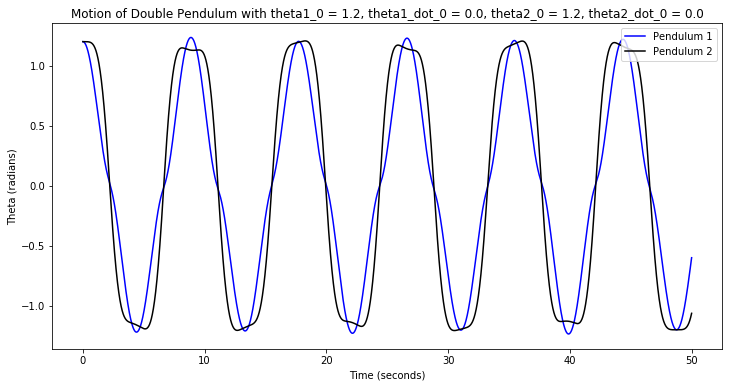

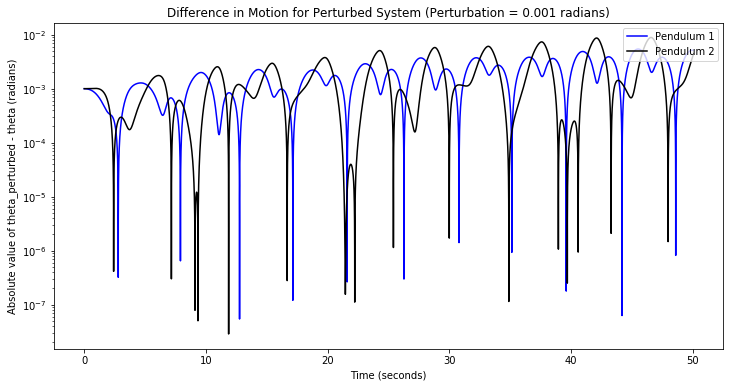

In [3]:
#Common plotting time (generate the full time here then use slices below)
t_start = 0.
t_end = 50.
del_t = 0.001
t_pts = np.arange(t_start, t_end+del_t, del_t)

#Create instance of double pendulum
p1 = DoublePendulum()

# Initial conditions specified
theta1_0 = 1.2
theta1_dot_0 = 0.0
theta2_0 = 1.2
theta2_dot_0 = 0.0

title1 = 'Motion of Double Pendulum with theta1_0 = ' + str(round(theta1_0, 3))
title1 +=  ', theta1_dot_0 = ' + str(round(theta1_dot_0,3))
title1 += ', theta2_0 = ' + str(round(theta2_0, 3)) + ', theta2_dot_0 = ' + str(round(theta2_dot_0,3))

theta1_0p = 1.201 #theta1_0 + 0.0001
theta2_0p = 1.201 #theta2_0 + 0.0001

title2 = 'Difference in Motion for Perturbed System (Perturbation = 0.001 radians)'

theta1, theta1_dot, theta2, theta2_dot = p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

plt.figure(figsize=(12, 6))
plt.plot(t_pts, theta1, 'b', label = 'Pendulum 1')
plt.plot(t_pts, theta2, 'k', label = 'Pendulum 2')
plt.title(title1)
plt.xlabel('Time (seconds)')
plt.ylabel('Theta (radians)')
plt.legend(loc = 'upper right')
plt.show()

theta1p, theta1_dotp, theta2p, theta2_dotp = p1.solve_ode(t_pts, theta1_0p, theta1_dot_0, theta2_0p, theta2_dot_0)

plt.figure(figsize=(12, 6))
plt.semilogy(t_pts, abs(theta1p - theta1), 'b', label = 'Pendulum 1')
plt.semilogy(t_pts, abs(theta2p - theta2), 'k', label = 'Pendulum 2')
plt.title(title2)
plt.xlabel('Time (seconds)')
plt.ylabel('Absolute value of theta_perturbed - theta (radians)')
plt.legend(loc = 'upper right')
plt.show()

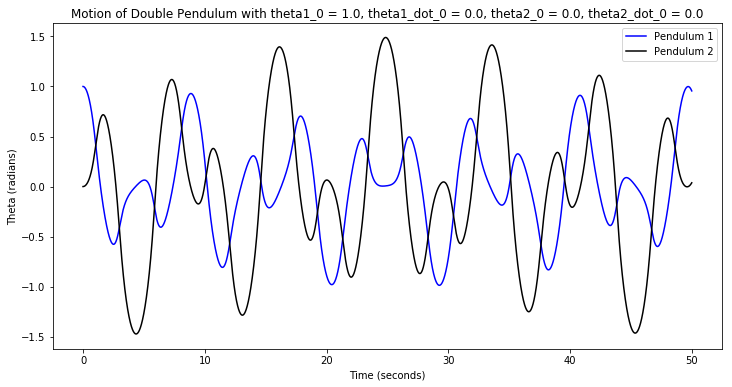

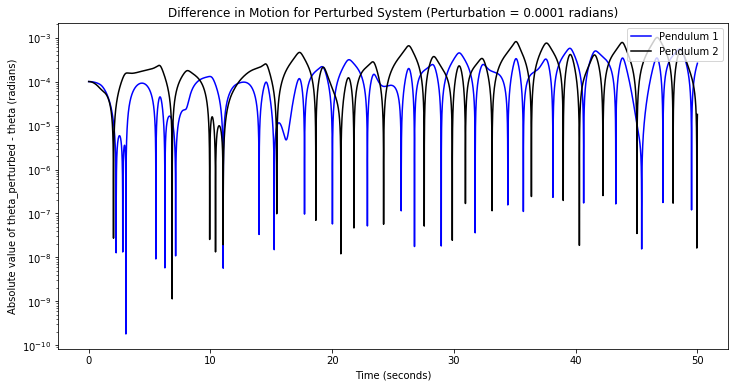

In [4]:
#Create instance of double pendulum
p2 = DoublePendulum()

# Initial conditions specified
theta1_0 = 1.0
theta1_dot_0 = 0.0
theta2_0 = 0.0
theta2_dot_0 = 0.0

title1 = 'Motion of Double Pendulum with theta1_0 = ' + str(round(theta1_0, 3))
title1 +=  ', theta1_dot_0 = ' + str(round(theta1_dot_0,3))
title1 += ', theta2_0 = ' + str(round(theta2_0, 3)) + ', theta2_dot_0 = ' + str(round(theta2_dot_0,3))

theta1_0p = theta1_0 + 0.0001
theta2_0p = theta2_0 + 0.0001

title2 = 'Difference in Motion for Perturbed System (Perturbation = 0.0001 radians)'

theta1, theta1_dot, theta2, theta2_dot = p2.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

plt.figure(figsize=(12, 6))
plt.plot(t_pts, theta1, 'b', label = 'Pendulum 1')
plt.plot(t_pts, theta2, 'k', label = 'Pendulum 2')
plt.title(title1)
plt.xlabel('Time (seconds)')
plt.ylabel('Theta (radians)')
plt.legend(loc = 'upper right')
plt.show()

theta1p, theta1_dotp, theta2p, theta2_dotp = p2.solve_ode(t_pts, theta1_0p, theta1_dot_0, theta2_0p, theta2_dot_0)

plt.figure(figsize=(12, 6))
plt.semilogy(t_pts, abs(theta1p - theta1), 'b', label = 'Pendulum 1')
plt.semilogy(t_pts, abs(theta2p - theta2), 'k', label = 'Pendulum 2')
plt.title(title2)
plt.xlabel('Time (seconds)')
plt.ylabel('Absolute value of theta_perturbed - theta (radians)')
plt.legend(loc = 'upper right')
plt.show()

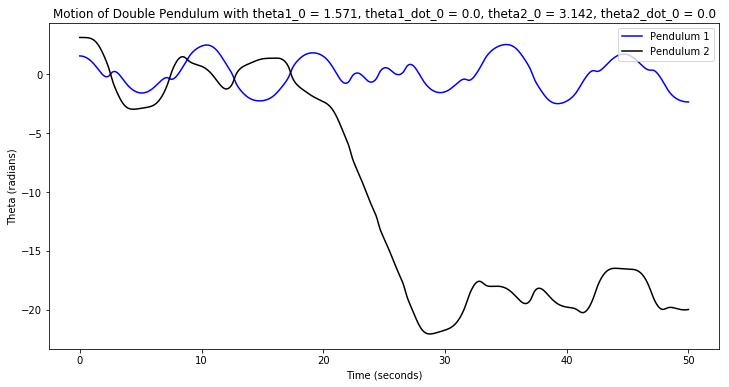

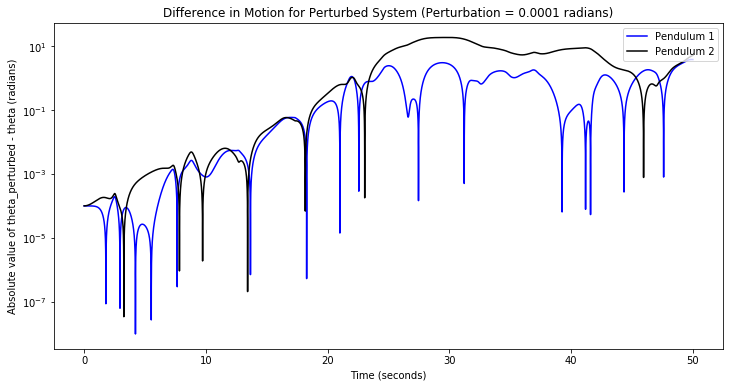

In [5]:
#Create instance of double pendulum
p3 = DoublePendulum()

# Initial conditions specified
theta1_0 = 0.5*np.pi
theta1_dot_0 = 0.0
theta2_0 = np.pi
theta2_dot_0 = 0.0

title1 = 'Motion of Double Pendulum with theta1_0 = ' + str(round(theta1_0, 3))
title1 +=  ', theta1_dot_0 = ' + str(round(theta1_dot_0,3))
title1 += ', theta2_0 = ' + str(round(theta2_0, 3)) + ', theta2_dot_0 = ' + str(round(theta2_dot_0,3))

theta1_0p = theta1_0 + 0.0001
theta2_0p = theta2_0 + 0.0001

title2 = 'Difference in Motion for Perturbed System (Perturbation = 0.0001 radians)'

theta1, theta1_dot, theta2, theta2_dot = p3.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

plt.figure(figsize=(12, 6))
plt.plot(t_pts, theta1, 'b', label = 'Pendulum 1')
plt.plot(t_pts, theta2, 'k', label = 'Pendulum 2')
plt.title(title1)
plt.xlabel('Time (seconds)')
plt.ylabel('Theta (radians)')
plt.legend(loc = 'upper right')
plt.show()

theta1p, theta1_dotp, theta2p, theta2_dotp = p3.solve_ode(t_pts, theta1_0p, theta1_dot_0, theta2_0p, theta2_dot_0)

plt.figure(figsize=(12, 6))
plt.semilogy(t_pts, abs(theta1p - theta1), 'b', label = 'Pendulum 1')
plt.semilogy(t_pts, abs(theta2p - theta2), 'k', label = 'Pendulum 2')
plt.title(title2)
plt.xlabel('Time (seconds)')
plt.ylabel('Absolute value of theta_perturbed - theta (radians)')
plt.legend(loc = 'upper right')
plt.show()

For this last case, it can be shown that the pendulum is performing chaotic motion because the pendulum is very sensative to initial conditions. When the position of the pendulum is shifted by only 0.0001 radians, the resulting motion quickly diverges from the motion of the unperturbed pendulum.